In [15]:
# Load libraries

import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
#read cvs file into dataframe
url = r'C:\Users\Oloba\Downloads\datatest.csv'
df = pd.read_csv(url)
df.head(15)

,Temperature,Humidity,Light,CO2,Humidity ratio,type
0,23.7000,26.272,585.200000,749.200000,0.004764,0
1,23.7180,26.290,578.400000,760.400000,0.004773,0
2,23.7300,26.230,572.666667,769.666667,0.004765,0
3,23.7225,26.125,493.750000,774.750000,0.004744,0
4,23.7540,26.200,488.600000,779.000000,0.004767,0
5,23.7600,26.260,568.666667,790.000000,0.004779,0
6,23.7300,26.290,536.333333,798.000000,0.004776,0
7,23.7540,26.290,509.000000,797.000000,0.004783,0
8,23.7540,26.350,476.000000,803.200000,0.004794,0
9,23.7360,26.390,510.000000,809.000000,0.004796,0


In [13]:
X = df.drop(columns=['type'])
X.head(15)

,Temperature,Humidity,Light,CO2,Humidity ratio
0,23.7000,26.272,585.200000,749.200000,0.004764
1,23.7180,26.290,578.400000,760.400000,0.004773
2,23.7300,26.230,572.666667,769.666667,0.004765
3,23.7225,26.125,493.750000,774.750000,0.004744
4,23.7540,26.200,488.600000,779.000000,0.004767
5,23.7600,26.260,568.666667,790.000000,0.004779
6,23.7300,26.290,536.333333,798.000000,0.004776
7,23.7540,26.290,509.000000,797.000000,0.004783
8,23.7540,26.350,476.000000,803.200000,0.004794
9,23.7360,26.390,510.000000,809.000000,0.004796


In [14]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,174.0,23.006905,0.731732,20.600000,22.731875,23.190000,23.566250,23.760000
Humidity,174.0,27.263706,1.213396,24.083333,26.290000,27.600000,28.200000,29.075000
Light,174.0,459.763355,35.338275,399.500000,438.000000,451.600000,469.000000,608.250000
CO2,174.0,979.523180,143.259626,507.333333,900.975000,1016.571429,1087.875000,1176.166667
Humidity ratio,174.0,0.004751,0.000364,0.003609,0.004573,0.004876,0.005021,0.005088


In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(15)

,Temperature,Humidity,Light,CO2,Humidity ratio
0,0.949931,-0.819657,3.559841,-1.612373,0.036137
1,0.974602,-0.804780,3.366860,-1.533967,0.059568
2,0.991048,-0.854370,3.204151,-1.469096,0.038867
3,0.980769,-0.941154,0.964527,-1.433510,-0.020083
4,1.023942,-0.879166,0.818372,-1.403758,0.042840
5,1.032165,-0.829575,3.090632,-1.326753,0.077961
6,0.991048,-0.804780,2.173025,-1.270749,0.069149
7,1.023942,-0.804780,1.397316,-1.277750,0.088334
8,1.023942,-0.755189,0.460789,-1.234347,0.118663
9,0.999272,-0.722128,1.425696,-1.193744,0.124440


In [16]:
observations = list(df.index)
variables = list(df.columns)

C:\Users\Oloba\AppData\Local\Temp\ipykernel_5820\1108321103.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


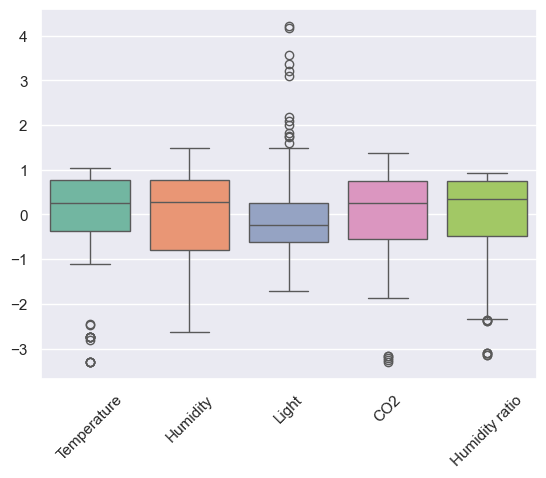

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

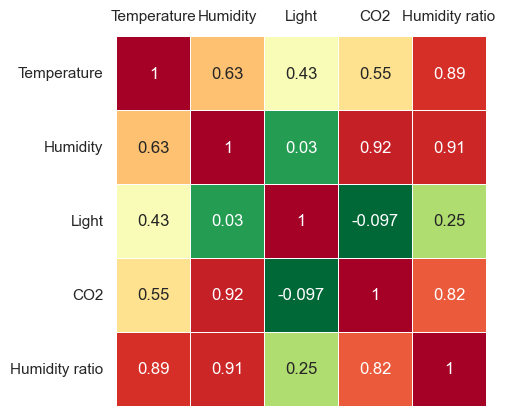

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')     

In [19]:
#PCA
# Separate features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Apply PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

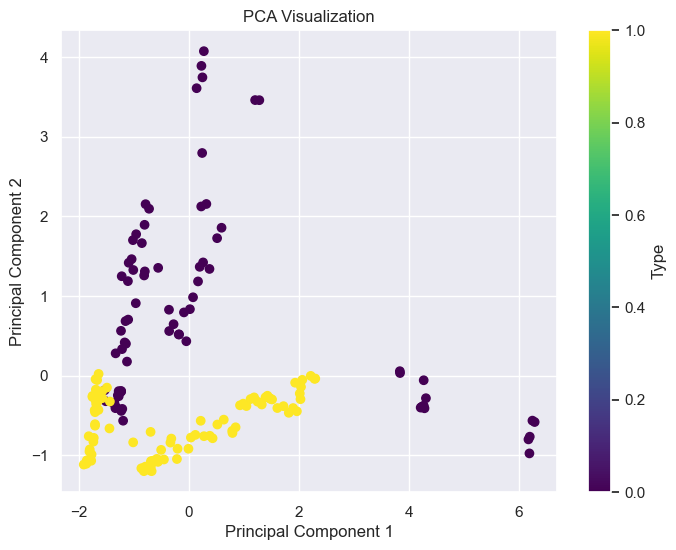

In [22]:
# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Type')
plt.show()

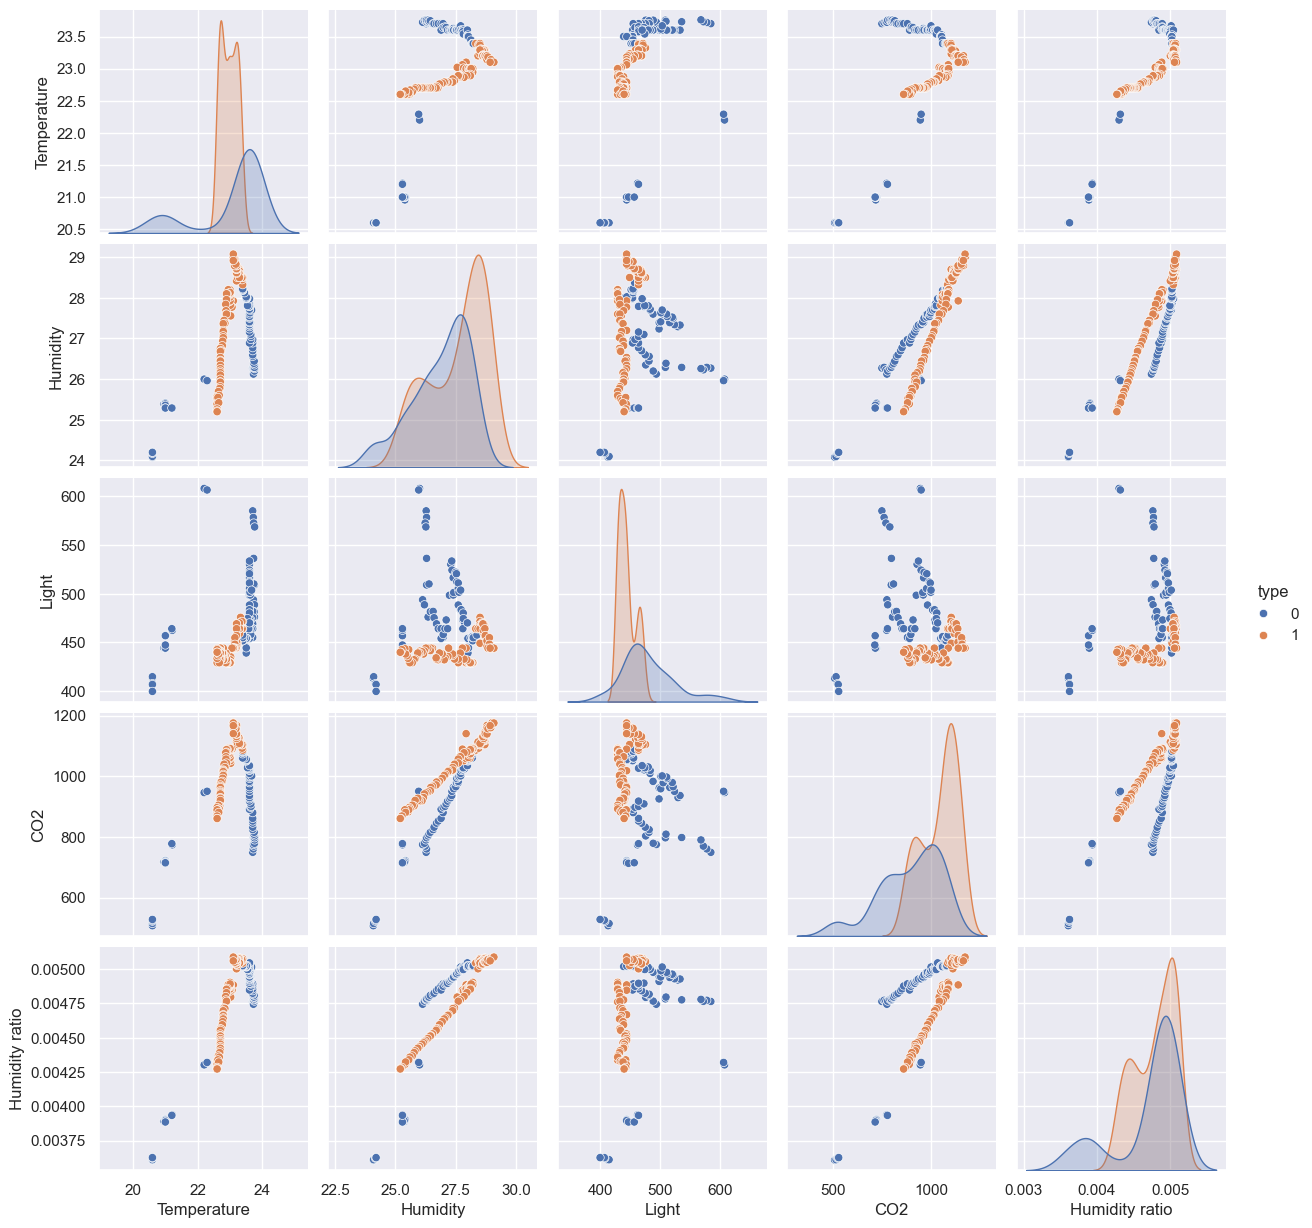

In [23]:
sns.pairplot(df, hue='type')
plt.show()

In [26]:
#
pca = PCA()
pca.fit_transform(X_scaled)
A = pca.components_.T 
Lambda = pca.explained_variance_ 


In [27]:
print(f'Eigenvectors:\n{A}')
print(f'Eigenvalues:\n{Lambda}')

Eigenvectors:
[[-4.61789818e-01  3.28164412e-01 -6.83740631e-01  2.21896370e-01
  -4.02888364e-01]
 [-5.06638330e-01 -2.31023649e-01  3.37930635e-01 -5.73502582e-01
  -4.96833322e-01]
 [-1.26780266e-01  8.44403987e-01  5.15051167e-01  7.50389817e-02
   3.44119961e-04]
 [-4.75679578e-01 -3.51600496e-01  3.54083019e-01  7.22238429e-01
   5.57036549e-02]
 [-5.36398611e-01  4.79081500e-02 -1.66280327e-01 -3.07567215e-01
   7.66638507e-01]]
Eigenvalues:
[3.43101293e+00 1.22236206e+00 2.96376858e-01 7.89270380e-02
 2.22843092e-04]


In [44]:
#Training our model on logistic regression
y = df['type']
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 500)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled

array([[-2.40118070e-02,  4.92911818e-01, -9.01062600e-01,
         5.26062512e-01,  2.46571513e-01],
       [-4.44971748e-01, -1.02489459e+00, -6.23855746e-01,
        -4.26091912e-01, -8.69731038e-01],
       [-3.18683766e-01, -2.98105333e-01, -8.08660315e-01,
         8.81279846e-02, -3.82611625e-01],
       [ 6.77588095e-01,  5.30096385e-01, -4.08250415e-01,
         4.48364450e-01,  6.91420733e-01],
       [ 3.82916136e-01,  1.12166904e+00,  2.69366340e-01,
         8.97600514e-01,  8.63439669e-01],
       [-2.40118070e-02,  6.99117144e-01, -9.01062600e-01,
         6.91347478e-01,  3.66788798e-01],
       [-8.57525983e-02,  6.99117144e-01, -9.01062600e-01,
         7.02649014e-01,  3.29824169e-01],
       [ 3.82916136e-01,  1.10054145e+00,  2.92466911e-01,
         9.26207527e-01,  8.50896944e-01],
       [-4.44971748e-01, -1.16011120e+00, -5.93054984e-01,
        -5.07674876e-01, -9.47034264e-01],
       [ 9.58228056e-01, -5.68538546e-01,  3.30967863e-01,
        -1.02271884e+00

In [47]:
X_test_scaled

array([[-4.44971748e-01, -8.72775912e-01, -4.39051176e-01,
        -2.97536938e-01, -7.82755771e-01],
       [ 8.17908076e-01,  1.45830710e-02,  1.78887058e+00,
        -1.91585036e-01,  4.65682606e-01],
       [-2.40118070e-02,  4.68122110e-01, -9.01062600e-01,
         4.81798159e-01,  2.32119685e-01],
       [ 1.03400085e+00, -9.15031102e-01,  1.56299833e+00,
        -1.36411941e+00,  2.88831109e-02],
       [ 1.16308173e-01,  4.66713600e-01, -4.39051176e-01,
         1.06041327e+00,  3.14798766e-01],
       [ 8.17908076e-01,  3.52624588e-01,  4.54170909e-01,
         2.18095651e-01,  6.70091633e-01],
       [-4.97371320e-02,  4.52628534e-01, -9.01062600e-01,
         5.05343031e-01,  2.07835551e-01],
       [-5.29163737e-01, -1.41702275e+00, -9.01062600e-01,
        -6.05503798e-01, -1.13900460e+00],
       [ 4.29689458e-01,  9.52648282e-01,  5.36306275e-01,
         8.07894570e-01,  7.91911552e-01],
       [-3.39169134e+00, -2.68129803e+00, -1.80968507e+00,
        -3.26419019e+00

In [48]:
from  sklearn.linear_model import LogisticRegression
log_reg =  LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)
log_reg.predict(X_train_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [49]:
log_reg.score(X_train_scaled, y_train)

0.9230769230769231

In [55]:
from sklearn.neighbors import KNeighborsClassifier
Classifier =  KNeighborsClassifier(n_neighbors = 5)
Classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = Classifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report (y_test, y_pred))
print (confusion_matrix (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.97      0.96        38

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70

[[30  2]
 [ 1 37]]


In [17]:
#model comparison
from pycaret.classification import *
dataset = df
clf = setup(data=dataset, target ='type')

,Description,Value
0,Session id,1327
1,Target,type
2,Target type,Binary
3,Original data shape,"(174, 6)"
4,Transformed data shape,"(174, 6)"
5,Transformed train set shape,"(121, 6)"
6,Transformed test set shape,"(53, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [18]:
# Step 4: Compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9833,1.0000,0.9857,0.9875,0.9856,0.9657,0.9682,1.8090
rf,Random Forest Classifier,0.9750,1.0000,0.9690,0.9875,0.9766,0.9490,0.9527,0.2630
ada,Ada Boost Classifier,0.9750,0.9729,0.9857,0.9732,0.9779,0.9490,0.9527,0.1610
et,Extra Trees Classifier,0.9750,1.0000,0.9690,0.9875,0.9766,0.9490,0.9527,0.1910
dt,Decision Tree Classifier,0.9673,0.9662,0.9690,0.9750,0.9699,0.9334,0.9381,0.0360
qda,Quadratic Discriminant Analysis,0.9673,0.9971,0.9857,0.9607,0.9713,0.9334,0.9381,0.0510
gbc,Gradient Boosting Classifier,0.9673,0.9829,0.9690,0.9750,0.9699,0.9334,0.9381,0.1370
xgboost,Extreme Gradient Boosting,0.9590,0.9843,0.9548,0.9750,0.9622,0.9167,0.9226,0.0720
lightgbm,Light Gradient Boosting Machine,0.9583,1.0000,0.9690,0.9625,0.9623,0.9157,0.9234,0.0720
knn,K Neighbors Classifier,0.9173,0.9846,0.9690,0.9015,0.9314,0.8252,0.8380,0.0480


In [19]:
# Step 5: Tune the best performing model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,1.0000,1.0000,0.8750,0.9333,0.8434,0.8539
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.9714,0.8571,1.0000,0.9231,0.8333,0.8452
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,1.0000,1.0000,0.8750,0.9333,0.8235,0.8367


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
final_model = finalize_model(tuned_model)